In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vision_data_engine.utils.dataset_stats import compute_dataset_stats

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi": 80,}
sns.set_style()
sns.set_theme(context="notebook", style="ticks", rc=custom_params)

In [3]:

datasets = [
    # "/media/magalhaes/schreder/schreder.txt"
    # "/media/magalhaes/ExDark/schreder_exdark.txt",
    # "/media/magalhaes/DAWN/Rain/valRain.txt",
    # "/media/magalhaes/DAWN/Fog/valFog.txt",
    # "/media/magalhaes/emergency_vehicles/schreder_d911.txt",
    # "/media/magalhaes/coco/val2017.txt",
    # "/media/magalhaes/schreder/night_test_set/schreder_night.txt",
    # "/media/magalhaes/schreder/day_test_set/schreder_day.txt",
    # "/media/magalhaes/schreder/night_test_set/schreder_night.txt",
    "/media/magalhaes/vision/datasets/vision_test_set.txt",
    # "/media/magalhaes/vision/datasets/vision_1681238204.txt"
    # "/media/magalhaes/vision/datasets/vision_1684402450.txt"
]

stats = {}
for dataset in datasets:
    stats[dataset] = compute_dataset_stats("../yolo/data/schreder.names", dataset)


In [4]:
def plot_stats(datasets, stats, save=False):
    df = pd.DataFrame()
    for dataset in datasets:
        df = pd.concat((df, stats[dataset]))
    df = df.reset_index(drop=True)
    df = df.sort_values(["class"])
    fig, axes = plt.subplots(1, 1, figsize=(11, 5))
    sns.color_palette()
    axes = [axes]
    sns.histplot(data=df, x="class", ax=axes[0], hue="Source", multiple="stack").set(
        title="Total of occurrences"
    )
    # sns.histplot(
    #     data=df,
    #     x="class",
    #     weights=[df.iloc[i]["area"] for i in range(len(df))],
    #     ax=axes[1],
    #     hue="Source",
    #     multiple="stack",
    # ).set(title="Total area")

    for ax in axes:
        ax.bar_label(ax.containers[0])
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")
            label.set_size("large")
    plt.show()
    if save:
        fig.savefig("vision_stats.svg", bbox_inches="tight")

    print(
        df[["Source", "image"]]
        .groupby("image", as_index=False)
        .aggregate({"Source": "first", "image": "first"})["Source"]
        .value_counts()
    )


# Schreder

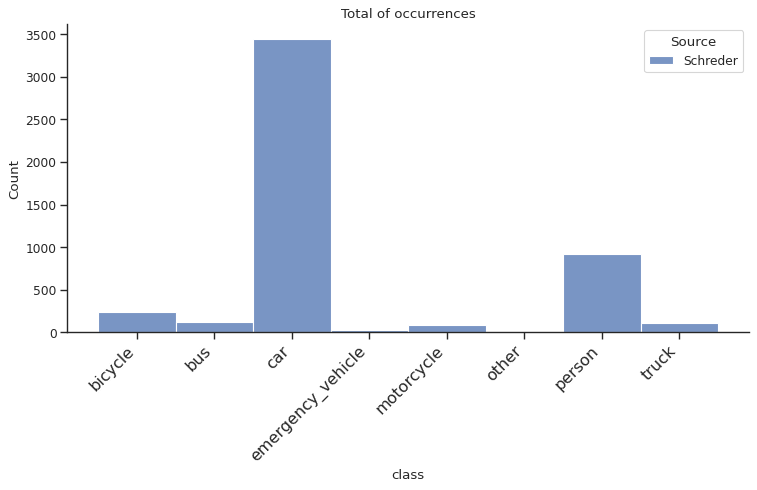

Schreder    1973
Name: Source, dtype: int64


In [16]:
plot_stats( [
    "/media/magalhaes/schreder/schreder.txt"
], stats, save=True)

## Emergency Vehicles

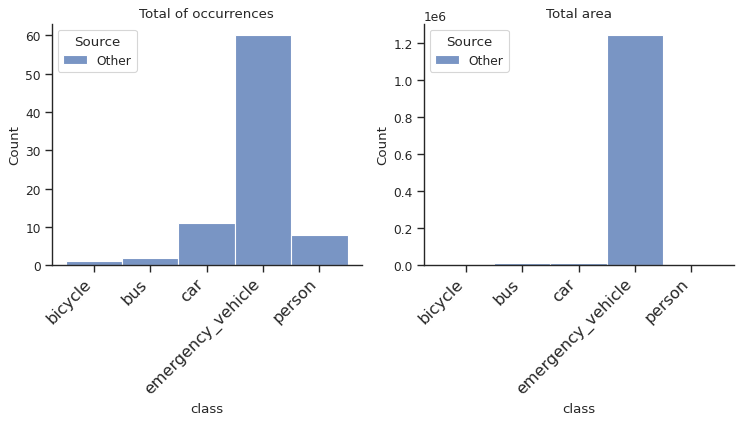

In [27]:
plot_stats( [
    "/media/magalhaes/emergency_vehicles/schreder_d911.txt"
], stats)

# DAWN Fog

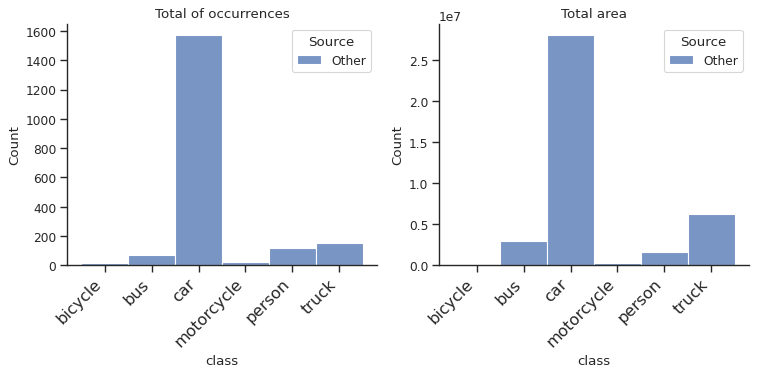

In [28]:
plot_stats( [
    "/media/magalhaes/DAWN/Fog/valFog.txt",
], stats)

# DAWN Rain

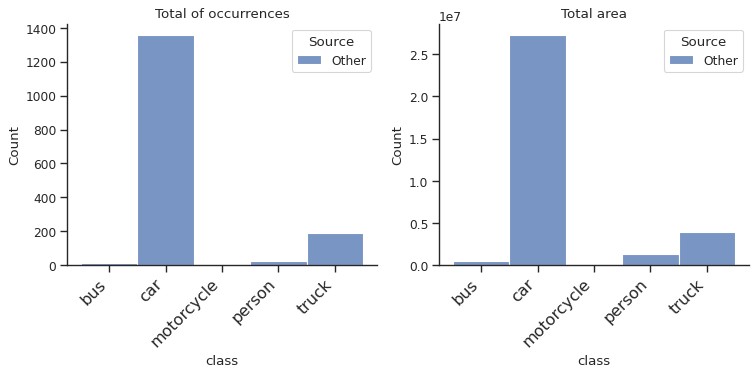

In [29]:
plot_stats( [
    "/media/magalhaes/DAWN/Rain/valRain.txt",
], stats)

# ExDark

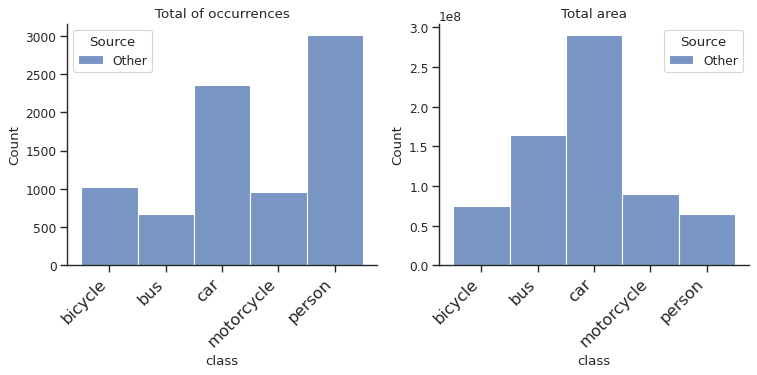

In [30]:
plot_stats( [
    "/media/magalhaes/ExDark/schreder_exdark.txt",
], stats)

## Training set

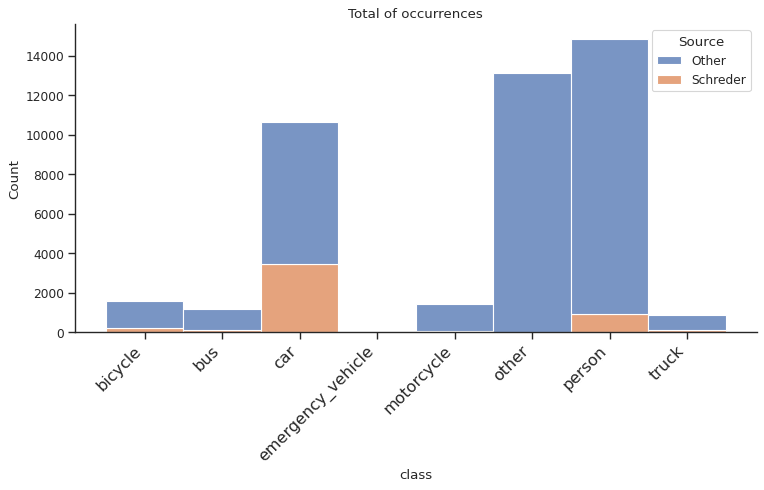

Other       5757
Schreder    1973
Name: Source, dtype: int64


In [7]:
plot_stats([
    "/media/magalhaes/vision/datasets/vision_1684402450.txt"
], stats, save=True)


## Schreder Test Set

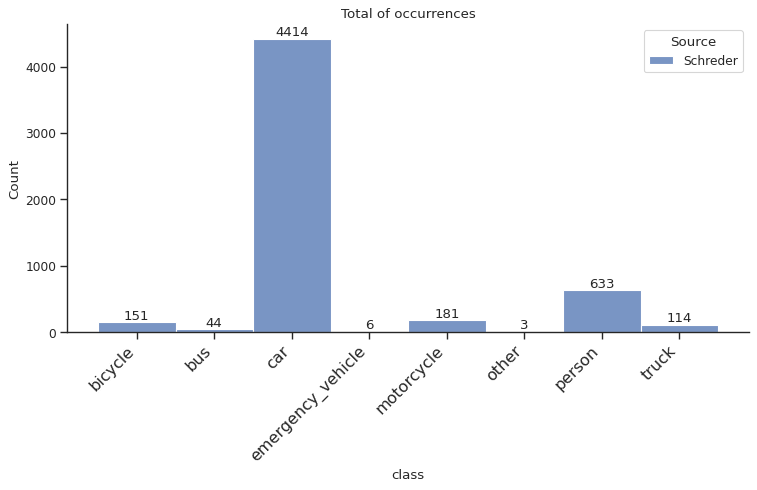

Schreder    1985
Name: Source, dtype: int64


In [6]:
plot_stats([
    "/media/magalhaes/vision/datasets/vision_test_set.txt"
], stats, save=True)

## Night Test set 

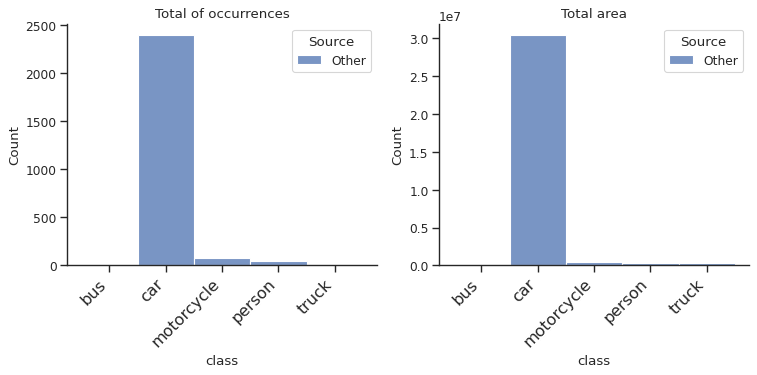

In [33]:
plot_stats([
    "/media/magalhaes/schreder/night_test_set/schreder_night.txt"
], stats)

## Day Test set

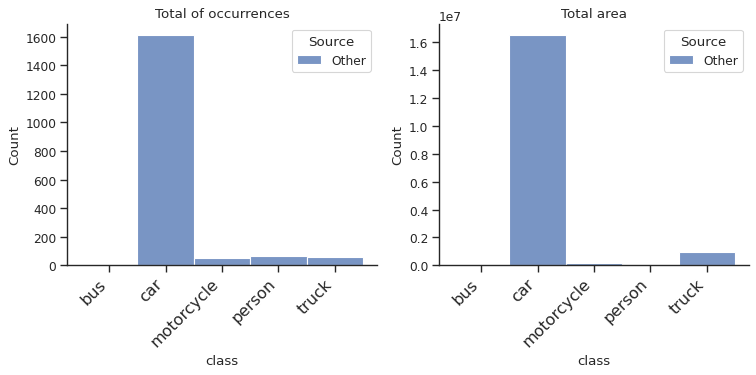

In [34]:
plot_stats([
    "/media/magalhaes/schreder/day_test_set/schreder_day.txt"
], stats)